# Watermarking

**A. Develop an algorithm that allows the image piece to be watermarked in another image. First, we need to calculate the DCT coefficients for the original image and then add its DCT coefficients to the image we intend to hide in the original image. Before adding two images, define a factor that is multiplied by the image being hidden. Set this coefficient between three numbers: 100, 10, and 1000. Then invert the DCT to reconstruct the image and represent it.**

**B. Divide the main image and the image that will be hidden into size 32 blocks for the main image and 16 for the other image. Insert each block of the target image that will be hidden in the blocks of the main image using the method of Part A and reconstruct the original image.**

**Compare images made with different coefficients (Calculate the difference between images with the original image). Use the original image of barbara, which is 402 by 566 in size. The target image is a 200 by 300 image as shown below.**

### Part A

The following code snippet import required third-party libraries:
+ `cv2` for reading and utilizing image processing functions
+ `numpy` for calculating and considering images as numerical matrixes
+ `matplotlib.pyplot` for showing images in the output

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

We will read an display barbara image, and produce the watermark image.

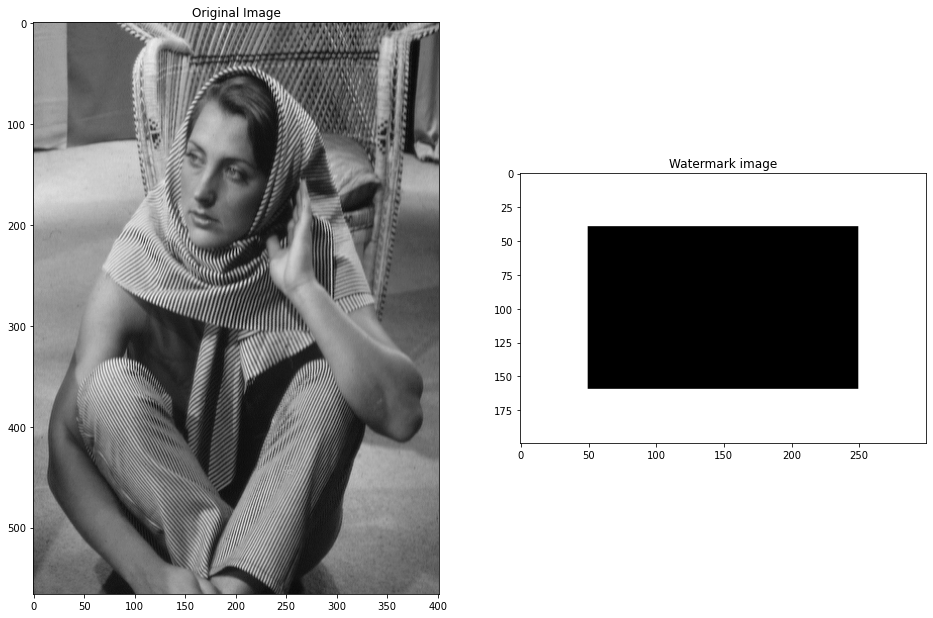

In [8]:
f, subplt = plt.subplots(1, 2, figsize=(16, 24))

# Read barbara image
barbara = cv2.imread('../../images/barbara.tif', 0)
subplt[0].imshow(barbara, cmap = 'gray')
subplt[0].set_title('Original Image')

img_wm = np.ones((200,300))
img_wm[40:160,50:250] = 0

subplt[1].imshow(img_wm, cmap = 'gray')
subplt[1].set_title('Watermark image')
plt.show()


We will calculate DCT coefficients for both images.

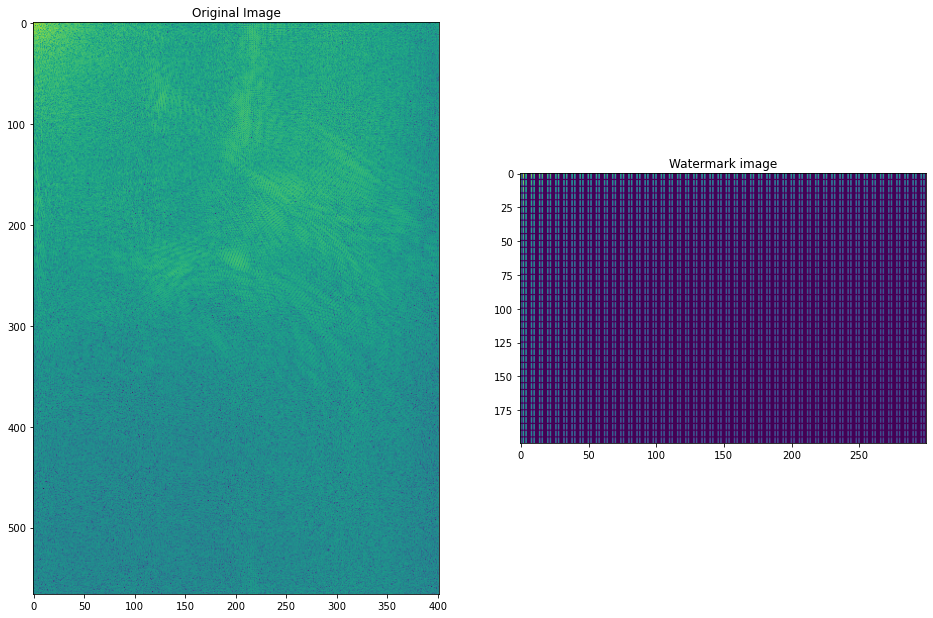

In [3]:
f, subplt = plt.subplots(1, 2, figsize=(16, 24))

barbara_dct = cv2.dct(np.array(barbara, dtype = np.float32))
subplt[0].imshow(np.log(0.0001 + np.abs(barbara_dct)))
subplt[0].set_title('Original Image')

img_wm_dct = cv2.dct(np.array(img_wm, dtype = np.float32))

subplt[1].imshow(np.log(0.0001 + np.abs(img_wm_dct)))
subplt[1].set_title('Watermark image')

plt.show()

We will add zero to the watermark image until its size become the size of barbara. Then we will watermark it into the barbara.

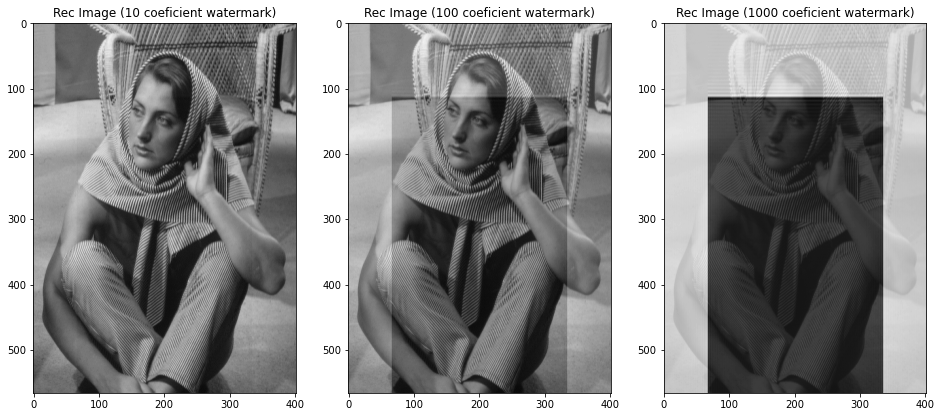

In [4]:
# Padding zero on the left and bottom of watermark image
tmp = np.zeros(barbara.shape)
tmp[:img_wm_dct.shape[0],:img_wm_dct.shape[1]] = img_wm_dct

img_wm_dct = tmp

f, subplt = plt.subplots(1, 3, figsize=(16, 24))

result = cv2.idct(np.array(barbara_dct + 10*img_wm_dct, dtype = np.float32))
subplt[0].imshow(result, cmap = 'gray')
subplt[0].set_title('Rec Image (10 coeficient watermark)')

result = cv2.idct(np.array(barbara_dct + 100*img_wm_dct, dtype = np.float32))
subplt[1].imshow(result, cmap = 'gray')
subplt[1].set_title('Rec Image (100 coeficient watermark)')

result = cv2.idct(np.array(barbara_dct + 1000*img_wm_dct, dtype = np.float32))
subplt[2].imshow(result, cmap = 'gray')
subplt[2].set_title('Rec Image (1000 coeficient watermark)')

plt.show()

### Part B

In [5]:
from numpy.lib.stride_tricks import as_strided as ast
# Read the array as a set of blocks
def block_view(A, block= (3, 3)):
    shape = (int(A.shape[0]/ block[0]), int(A.shape[1]/ block[1]))+ block
    strides = (block[0]* A.strides[0], block[1]* A.strides[1])+ A.strides
    return ast(A, shape = shape, strides= strides)

In [6]:
# Apply a function to each block of an image
def blkproc(I,block_size,fun):
    J = np.copy(I)
    BJ = block_view(J,block_size)
    for n in range(BJ.shape[0]):
        for m in range(BJ.shape[1]):
            BJ[n,m] = fun(BJ[n,m])
    return J

In [7]:
barbara_blocked = block_view(barbara, (32, 32))
img_wm = cv2.idct(np.array(img_wm_dct, dtype = np.float32))
img_wm_blocked = block_view(img_wm, (16, 16))

print(barbara_blocked.shape, img_wm_blocked.shape)

(17, 12, 32, 32) (35, 25, 16, 16)
